In [1]:
import pandas as pd

#Example of profit and payoff of
df = pd.DataFrame(list(range(101)), columns = ['Stock Price'])
df['$50 Call Payoff'] = df['Stock Price'].apply(lambda x: max(x-50, 0))
df['$50 Call Profit'] = df['$50 Call Payoff'] - 5
df = df.set_index('Stock Price')
print(df)

             $50 Call Payoff  $50 Call Profit
Stock Price                                  
0                          0               -5
1                          0               -5
2                          0               -5
3                          0               -5
4                          0               -5
...                      ...              ...
96                        46               41
97                        47               42
98                        48               43
99                        49               44
100                       50               45

[101 rows x 2 columns]


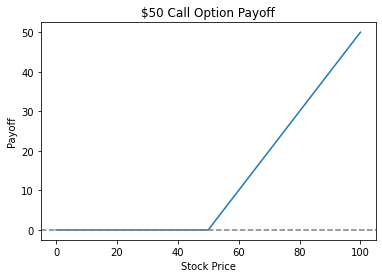

In [2]:
import matplotlib.pyplot as plt
#Graph the payoff
ax = df['$50 Call Payoff'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("$50 Call Option Payoff")
plt.show()

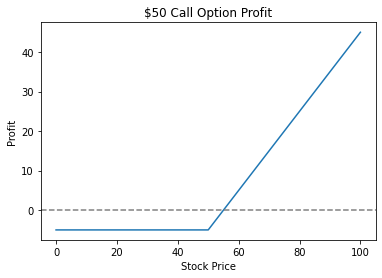

In [3]:
import matplotlib.pyplot as plt
#The cost is just a linear shift downwards
ax = df['$50 Call Profit'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("$50 Call Option Profit")
plt.show()

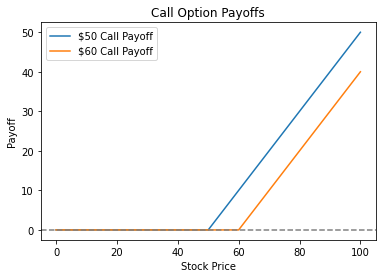

In [4]:
#Compare with a $60 strike price call
df['$60 Call Payoff'] = [max(x-60, 0) for x in df.index]
ax = df[['$50 Call Payoff', '$60 Call Payoff']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Call Option Payoffs")
plt.show()

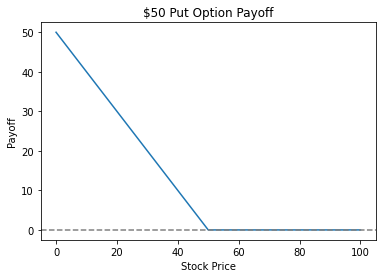

In [5]:
#A put option works in the opposite way
df['$50 Put Payoff'] = [max(50-x, 0) for x in df.index]
ax = df['$50 Put Payoff'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("$50 Put Option Payoff")
plt.show()

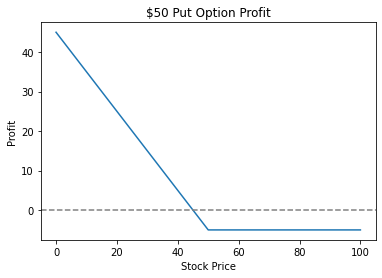

In [6]:
#Profit still is just a linear shift down
df['$50 Put Profit'] = df['$50 Put Payoff'] - 5
ax = df['$50 Put Profit'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("$50 Put Option Profit")
plt.show()

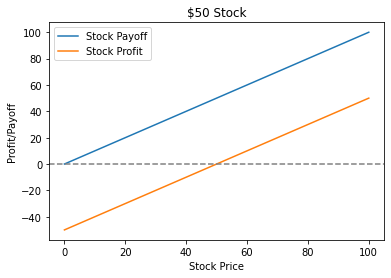

In [7]:
#Notice the obvious payoff/profit that comes from actually owning a stock if it were at $50 right now
df['Stock Payoff'] = df.index
df['Stock Profit'] = df['Stock Payoff']-50
ax = df[['Stock Payoff', 'Stock Profit']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit/Payoff')
plt.title("$50 Stock")
plt.show()

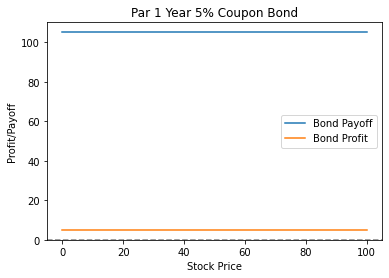

In [8]:
#Now consider a 1 year 5% coupon bond priced at $100. It's payoff is independent of stock price!
df['Bond Payoff'] = 105
df['Bond Profit'] = df['Bond Payoff'] - 100
ax = df[['Bond Payoff', 'Bond Profit']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit/Payoff')
plt.title("Par 1 Year 5% Coupon Bond")
plt.show()

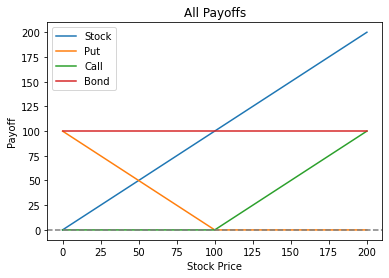

In [9]:
#Set up 4 payoff schemes
#1. A bond priced which pays $100 in a year
#2. A put with a strike price of $100
#3. A call with a strike price of $100
#4. A stock which is currently priced at $100

#Create a dataframe of payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['Put'] = payoffs['Stock'].apply(lambda x: max(0, 100-x))
payoffs['Call'] = payoffs['Stock'].apply(lambda x: max(0, x-100))
payoffs['Bond'] = 100

#Graph all payoffs
ax = payoffs.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("All Payoffs")
plt.show()

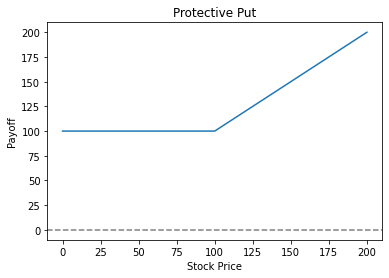

In [10]:
#Now consider a protective put
payoffs['Protective Put'] = payoffs['Stock'] + payoffs['Put']

ax = payoffs['Protective Put'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Protective Put")
plt.show()

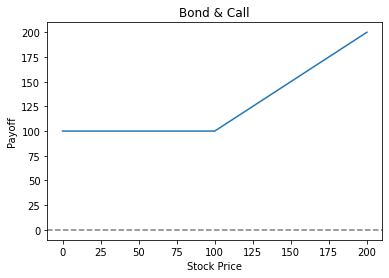

In [11]:
#And a bond and call option
payoffs['Bond & Call'] = payoffs['Bond'] + payoffs['Call']

ax = payoffs['Bond & Call'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Bond & Call')
plt.show()

In [12]:
#Confirm the payoffs are the same
print(abs(payoffs['Bond & Call'] - payoffs['Protective Put']).max())

0


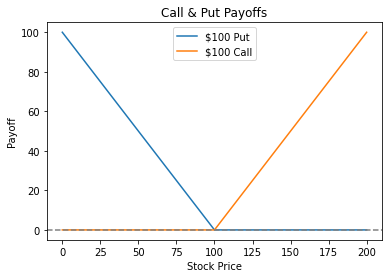

In [13]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['$100 Put'] = payoffs['Stock'].apply(lambda x: max(0, 100-x))
payoffs['$100 Call'] = payoffs['Stock'].apply(lambda x: max(0, x-100))

#Graph the call and put payoffs
ax = payoffs[['$100 Put', '$100 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Call & Put Payoffs")
plt.show()

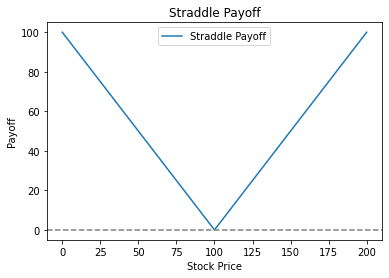

In [14]:
#Compute the straddle patoff
payoffs['Straddle Payoff'] = payoffs['$100 Put'] + payoffs['$100 Call']

#Graph the straddle payoff
ax = payoffs[['Straddle Payoff']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Straddle Payoff")
plt.show()

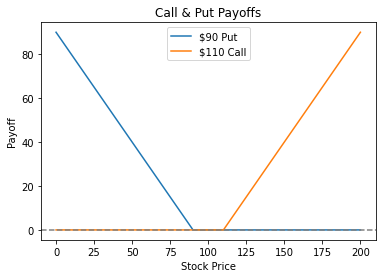

In [15]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['$90 Put'] = payoffs['Stock'].apply(lambda x: max(0, 90-x))
payoffs['$110 Call'] = payoffs['Stock'].apply(lambda x: max(0, x-110))

#Graph the call and put payoffs
ax = payoffs[['$90 Put', '$110 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Call & Put Payoffs")
plt.show()

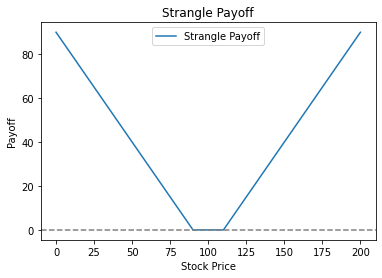

In [16]:
#Compute the strangle patoff
payoffs['Strangle Payoff'] = payoffs['$90 Put'] + payoffs['$110 Call']

#Graph the straddle payoff
ax = payoffs[['Strangle Payoff']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Strangle Payoff")
plt.show()

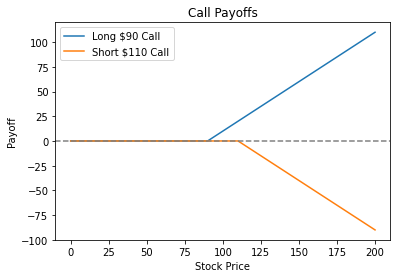

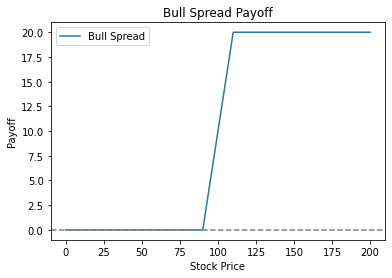

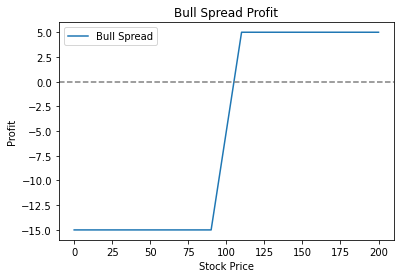

In [17]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['Long $90 Call'] = payoffs['Stock'].apply(lambda x: max(0, x-90))
payoffs['Short $110 Call'] = payoffs['Stock'].apply(lambda x: -max(0, x-110))

#Graph the call and put payoffs
ax = payoffs[['Long $90 Call', 'Short $110 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Call Payoffs")
plt.show()

#Compute the bear spread
payoffs['Bull Spread'] = payoffs['Long $90 Call'] + payoffs['Short $110 Call']

#Graph the bear spread payoff
ax = payoffs[['Bull Spread']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Bull Spread Payoff")
plt.show()

#Graph the bear spread if you got $10 for the short position, and paid $25 for the long position
ax = (payoffs[['Bull Spread']] - 15).plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("Bull Spread Profit")
plt.show()

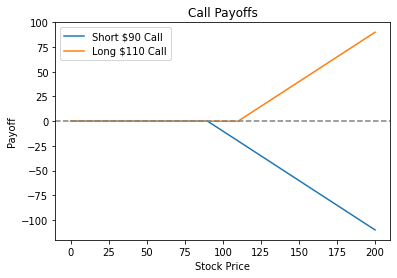

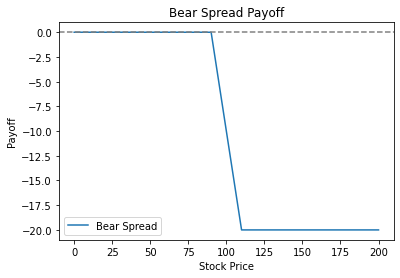

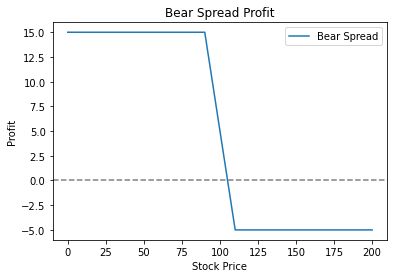

In [18]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['Short $90 Call'] = payoffs['Stock'].apply(lambda x: -max(0, x-90))
payoffs['Long $110 Call'] = payoffs['Stock'].apply(lambda x: max(0, x-110))

#Graph the call and put payoffs
ax = payoffs[['Short $90 Call', 'Long $110 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Call Payoffs")
plt.show()

#Compute the bear spread
payoffs['Bear Spread'] = payoffs['Short $90 Call'] + payoffs['Long $110 Call']

#Graph the bear spread payoff
ax = payoffs[['Bear Spread']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Bear Spread Payoff")
plt.show()

#Graph the bear spread if you got $25 for the short position, and paid $10 for the long position
ax = (payoffs[['Bear Spread']] + 15).plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("Bear Spread Profit")
plt.show()

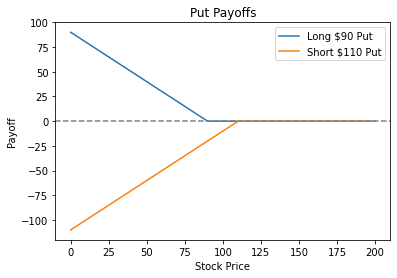

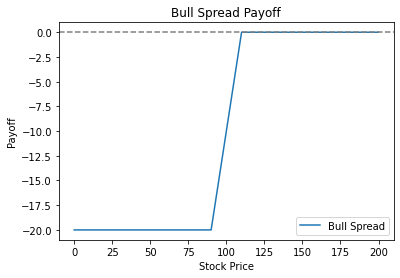

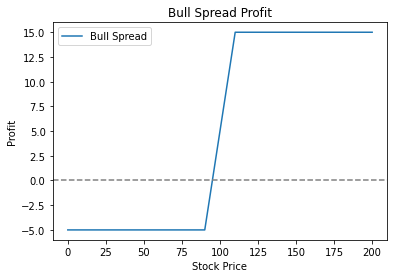

In [19]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['Long $90 Put'] = payoffs['Stock'].apply(lambda x: max(0, 90-x))
payoffs['Short $110 Put'] = payoffs['Stock'].apply(lambda x: -max(0, 110-x))

#Graph the call and put payoffs
ax = payoffs[['Long $90 Put', 'Short $110 Put']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Put Payoffs")
plt.show()

#Compute the bear spread
payoffs['Bull Spread'] = payoffs['Long $90 Put'] + payoffs['Short $110 Put']

#Graph the bear spread payoff
ax = payoffs[['Bull Spread']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Bull Spread Payoff")
plt.show()

#In this case it costs more for the short than the long
ax = (payoffs[['Bull Spread']] + 15).plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("Bull Spread Profit")
plt.show()

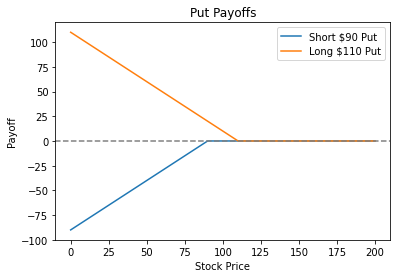

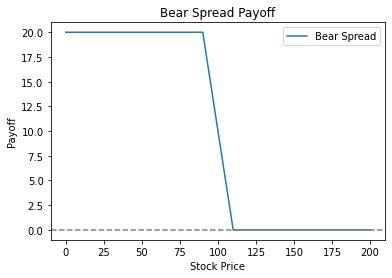

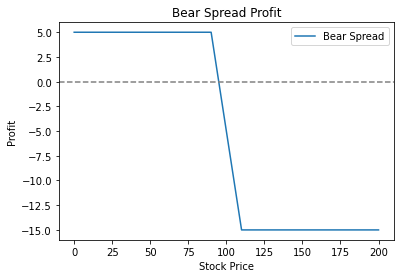

In [20]:
#Compute option payoffs
payoffs = pd.DataFrame(list(range(0,201)), columns=['Stock'])
payoffs['Short $90 Put'] = payoffs['Stock'].apply(lambda x: -max(0, 90-x))
payoffs['Long $110 Put'] = payoffs['Stock'].apply(lambda x: max(0, 110-x))

#Graph the call and put payoffs
ax = payoffs[['Short $90 Put', 'Long $110 Put']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Put Payoffs")
plt.show()

#Compute the bear spread
payoffs['Bear Spread'] = payoffs['Short $90 Put'] + payoffs['Long $110 Put']

#Graph the bear spread payoff
ax = payoffs[['Bear Spread']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title("Bear Spread Payoff")
plt.show()

#In this case it costs more for the long than the short
ax = (payoffs[['Bear Spread']] - 15).plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title("Bear Spread Profit")
plt.show()